In [1]:
from raptorfinance import RaptorFinance
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('bmh')

In [2]:
style.use('ggplot')

In [3]:
df=RaptorFinance('SBIN.NS', result_range='1mo', interval='15m', dropna='True').result

In [5]:
print(df.head(25))

                       Open    High     Low   Close    Volume
2021-05-24 09:15:00  417.35  418.40  410.15  410.60  13563020
2021-05-24 09:30:00  410.55  411.60  407.10  407.10  12268040
2021-05-24 09:45:00  407.25  409.00  406.50  406.65   8670917
2021-05-24 10:00:00  406.70  410.90  405.40  410.70   8816829
2021-05-24 10:15:00  410.80  413.25  410.70  411.85   9116776
2021-05-24 10:30:00  411.85  412.45  410.70  410.85   2988395
2021-05-24 10:45:00  410.95  414.30  410.80  414.00   5468006
2021-05-24 11:00:00  414.05  414.75  411.50  411.60   4249346
2021-05-24 11:15:00  411.20  412.50  411.20  411.75   3231640
2021-05-24 11:30:00  411.70  412.25  409.85  410.45   3937813
2021-05-24 11:45:00  410.45  410.95  409.00  409.55   2747903
2021-05-24 12:00:00  409.70  410.70  409.70  410.45   1643172
2021-05-24 12:15:00  410.45  410.50  409.60  409.75   1339740
2021-05-24 12:30:00  409.65  409.95  408.55  408.60   1889082
2021-05-24 12:45:00  408.65  409.45  407.95  409.15   2544915
2021-05-

In [6]:
x= df[['High','Open','Low','Volume']].values
y= df['Close'].values

In [7]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [8]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [9]:
y_pred=regressor.predict(x_test)
result=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
result.head(10)

,Actual,Predicted
0,434.70,434.940544
1,410.65,411.169952
2,440.00,439.640605
3,426.95,427.061140
4,424.75,424.621719
5,415.15,414.195654
6,432.30,431.466356
7,429.40,429.020949
8,406.40,406.575447
9,427.90,428.536832


In [10]:
import math

In [11]:
graph =result.head(25)

<AxesSubplot:>

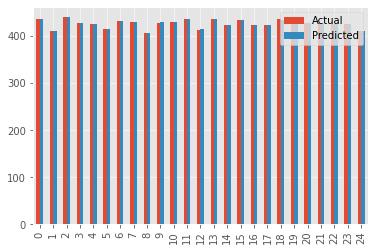

In [12]:
graph.plot(kind='bar')

In [13]:
df.shape

(525, 5)

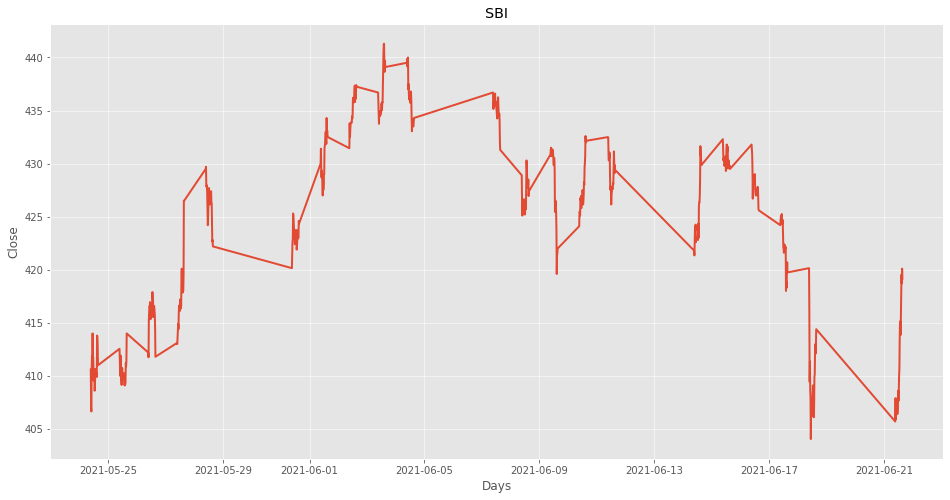

In [15]:
plt.figure(figsize=(16,8))
plt.title('SBI')
plt.xlabel('Days')
plt.ylabel('Close')
plt.plot(df['Close'])
plt.show()

In [16]:
df=df[['Close']]
df.head(4)

,Close
2021-05-24 09:15:00,410.60
2021-05-24 09:30:00,407.10
2021-05-24 09:45:00,406.65
2021-05-24 10:00:00,410.70


In [17]:
future_days=25
df['Prediction']=df[['Close']].shift(-future_days)
df.tail(4)

,Close,Prediction
2021-06-21 14:30:00,419.55,NaN
2021-06-21 14:45:00,418.70,NaN
2021-06-21 15:00:00,420.10,NaN
2021-06-21 15:15:00,419.15,NaN


In [18]:
X=np.array(df.drop(["Prediction"],1))[:-future_days]
print(X)

[[410.6 ]
 [407.1 ]
 [406.65]
 [410.7 ]
 [411.85]
 [410.85]
 [414.  ]
 [411.6 ]
 [411.75]
 [410.45]
 [409.55]
 [410.45]
 [409.75]
 [408.6 ]
 [409.15]
 [410.65]
 [410.5 ]
 [410.2 ]
 [410.15]
 [410.25]
 [409.9 ]
 [413.8 ]
 [413.7 ]
 [412.9 ]
 [411.  ]
 [412.55]
 [411.6 ]
 [410.  ]
 [410.2 ]
 [411.9 ]
 [410.65]
 [409.6 ]
 [409.15]
 [410.4 ]
 [410.75]
 [410.2 ]
 [410.15]
 [410.  ]
 [410.15]
 [409.75]
 [410.25]
 [409.5 ]
 [409.1 ]
 [409.6 ]
 [409.2 ]
 [409.45]
 [411.2 ]
 [410.9 ]
 [411.35]
 [414.  ]
 [412.2 ]
 [411.75]
 [415.25]
 [416.05]
 [416.55]
 [416.5 ]
 [416.95]
 [416.45]
 [415.35]
 [415.9 ]
 [415.5 ]
 [416.3 ]
 [416.3 ]
 [416.95]
 [417.9 ]
 [417.25]
 [417.25]
 [415.55]
 [416.45]
 [416.6 ]
 [416.55]
 [416.1 ]
 [415.7 ]
 [414.45]
 [411.8 ]
 [413.1 ]
 [413.  ]
 [413.6 ]
 [414.05]
 [414.9 ]
 [414.4 ]
 [415.95]
 [416.6 ]
 [416.65]
 [416.1 ]
 [416.35]
 [417.2 ]
 [416.7 ]
 [416.35]
 [416.6 ]
 [419.4 ]
 [420.1 ]
 [419.05]
 [418.9 ]
 [417.85]
 [418.05]
 [418.  ]
 [419.45]
 [426.5 ]
 [426.5 ]


In [19]:
Y=np.array(df['Prediction'])[:-future_days]
print(Y)

[412.55 411.6  410.   410.2  411.9  410.65 409.6  409.15 410.4  410.75
 410.2  410.15 410.   410.15 409.75 410.25 409.5  409.1  409.6  409.2
 409.45 411.2  410.9  411.35 414.   412.2  411.75 415.25 416.05 416.55
 416.5  416.95 416.45 415.35 415.9  415.5  416.3  416.3  416.95 417.9
 417.25 417.25 415.55 416.45 416.6  416.55 416.1  415.7  414.45 411.8
 413.1  413.   413.6  414.05 414.9  414.4  415.95 416.6  416.65 416.1
 416.35 417.2  416.7  416.35 416.6  419.4  420.1  419.05 418.9  417.85
 418.05 418.   419.45 426.5  426.5  429.5  429.7  427.9  427.8  427.95
 427.25 425.5  424.2  424.75 426.1  426.8  427.7  426.95 426.4  426.15
 426.4  426.85 426.9  427.4  426.35 426.3  424.5  422.65 422.8  422.2
 420.15 421.4  422.6  422.95 425.3  425.15 424.55 423.85 423.75 423.05
 422.4  422.9  422.95 423.05 423.75 423.15 421.9  422.25 422.75 423.7
 423.5  422.95 423.1  424.6  424.35 430.   431.4  429.55 428.7  429.35
 429.1  428.25 427.   428.8  427.5  427.95 428.95 429.   431.45 431.65
 431.9  432.

In [30]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

In [31]:
x_future=df.drop(['Prediction'],1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

array([[420.15],
       [416.05],
       [409.45],
       [411.35],
       [408.6 ],
       [407.9 ],
       [404.05],
       [407.25],
       [407.6 ],
       [406.2 ],
       [407.2 ],
       [407.5 ],
       [408.25],
       [409.1 ],
       [407.2 ],
       [406.3 ],
       [406.1 ],
       [407.25],
       [409.95],
       [410.1 ],
       [412.15],
       [413.  ],
       [412.1 ],
       [412.9 ],
       [414.4 ]])

In [32]:
lr=LinearRegression().fit(x_train,y_train)

In [33]:
lr_prediction=lr.predict(x_future)
print(lr_prediction)

[421.48285535 418.37279922 413.36636741 414.80761293 412.72159967
 412.19061448 409.27019592 411.6975568  411.9630494  410.90107901
 411.65962929 411.88719437 412.45610708 413.10087481 411.65962929
 410.97693404 410.82522399 411.6975568  413.74564254 413.85942509
 415.41445315 416.05922088 415.37652564 415.98336586 417.12119127]


<ipython-input-36-8907fb196e3a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction']=predictions


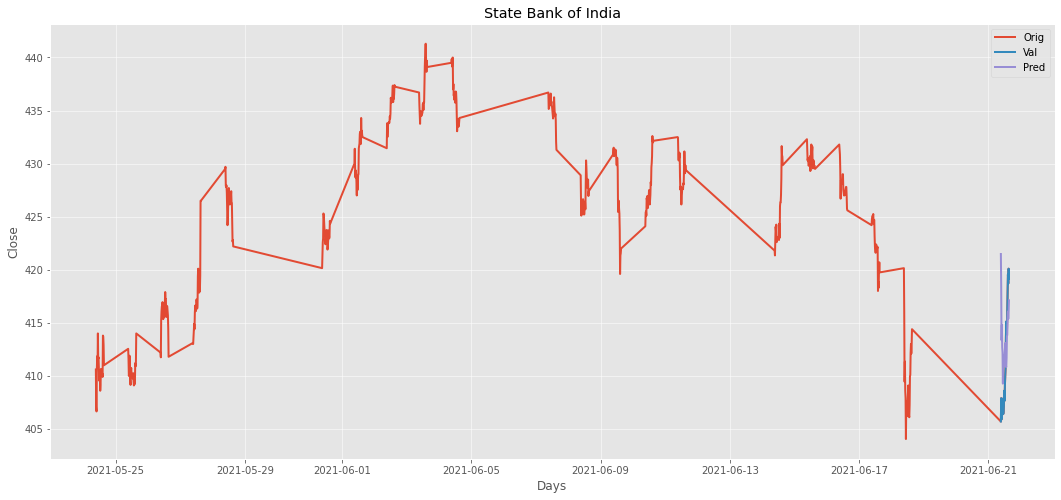

In [36]:
predictions=lr_prediction
valid=df[X.shape[0]:]
valid['Prediction']=predictions
plt.figure(figsize=(18,8))
plt.title('State Bank of India')
plt.xlabel('Days')
plt.ylabel('Close')
plt.plot(df['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Orig','Val','Pred'])
plt.show()

In [37]:
valid

,Close,Prediction
2021-06-21 09:15:00,405.70,421.482855
2021-06-21 09:30:00,407.90,418.372799
2021-06-21 09:45:00,405.90,413.366367
2021-06-21 10:00:00,407.35,414.807613
2021-06-21 10:15:00,407.60,412.721600
2021-06-21 10:30:00,407.85,412.190614
2021-06-21 10:45:00,407.20,409.270196
2021-06-21 11:00:00,406.40,411.697557
2021-06-21 11:15:00,406.60,411.963049
2021-06-21 11:30:00,407.15,410.901079
